Feature ranking:
1. feature 4 (0.079947)
2. feature 42 (0.067183)
3. feature 22 (0.060632)
4. feature 40 (0.048810)
5. feature 6 (0.046874)
6. feature 3 (0.042608)
7. feature 17 (0.038636)
8. feature 39 (0.038097)
9. feature 12 (0.037706)
10. feature 13 (0.036014)
11. feature 43 (0.032423)
12. feature 1 (0.028454)
13. feature 25 (0.025051)
14. feature 0 (0.021989)
15. feature 21 (0.018678)
16. feature 26 (0.017624)
17. feature 53 (0.017291)
18. feature 44 (0.016853)
19. feature 15 (0.016675)
20. feature 31 (0.015717)
21. feature 24 (0.015564)
22. feature 29 (0.014375)
23. feature 20 (0.012875)
24. feature 14 (0.012835)
25. feature 49 (0.012515)
26. feature 36 (0.012354)
27. feature 7 (0.012298)
28. feature 16 (0.011948)
29. feature 50 (0.011574)
30. feature 35 (0.011282)
31. feature 48 (0.010919)
32. feature 2 (0.010376)
33. feature 9 (0.009511)
34. feature 30 (0.009487)
35. feature 38 (0.009468)
36. feature 11 (0.008858)
37. feature 32 (0.008844)
38. feature 10 (0.008379)
39. feature 

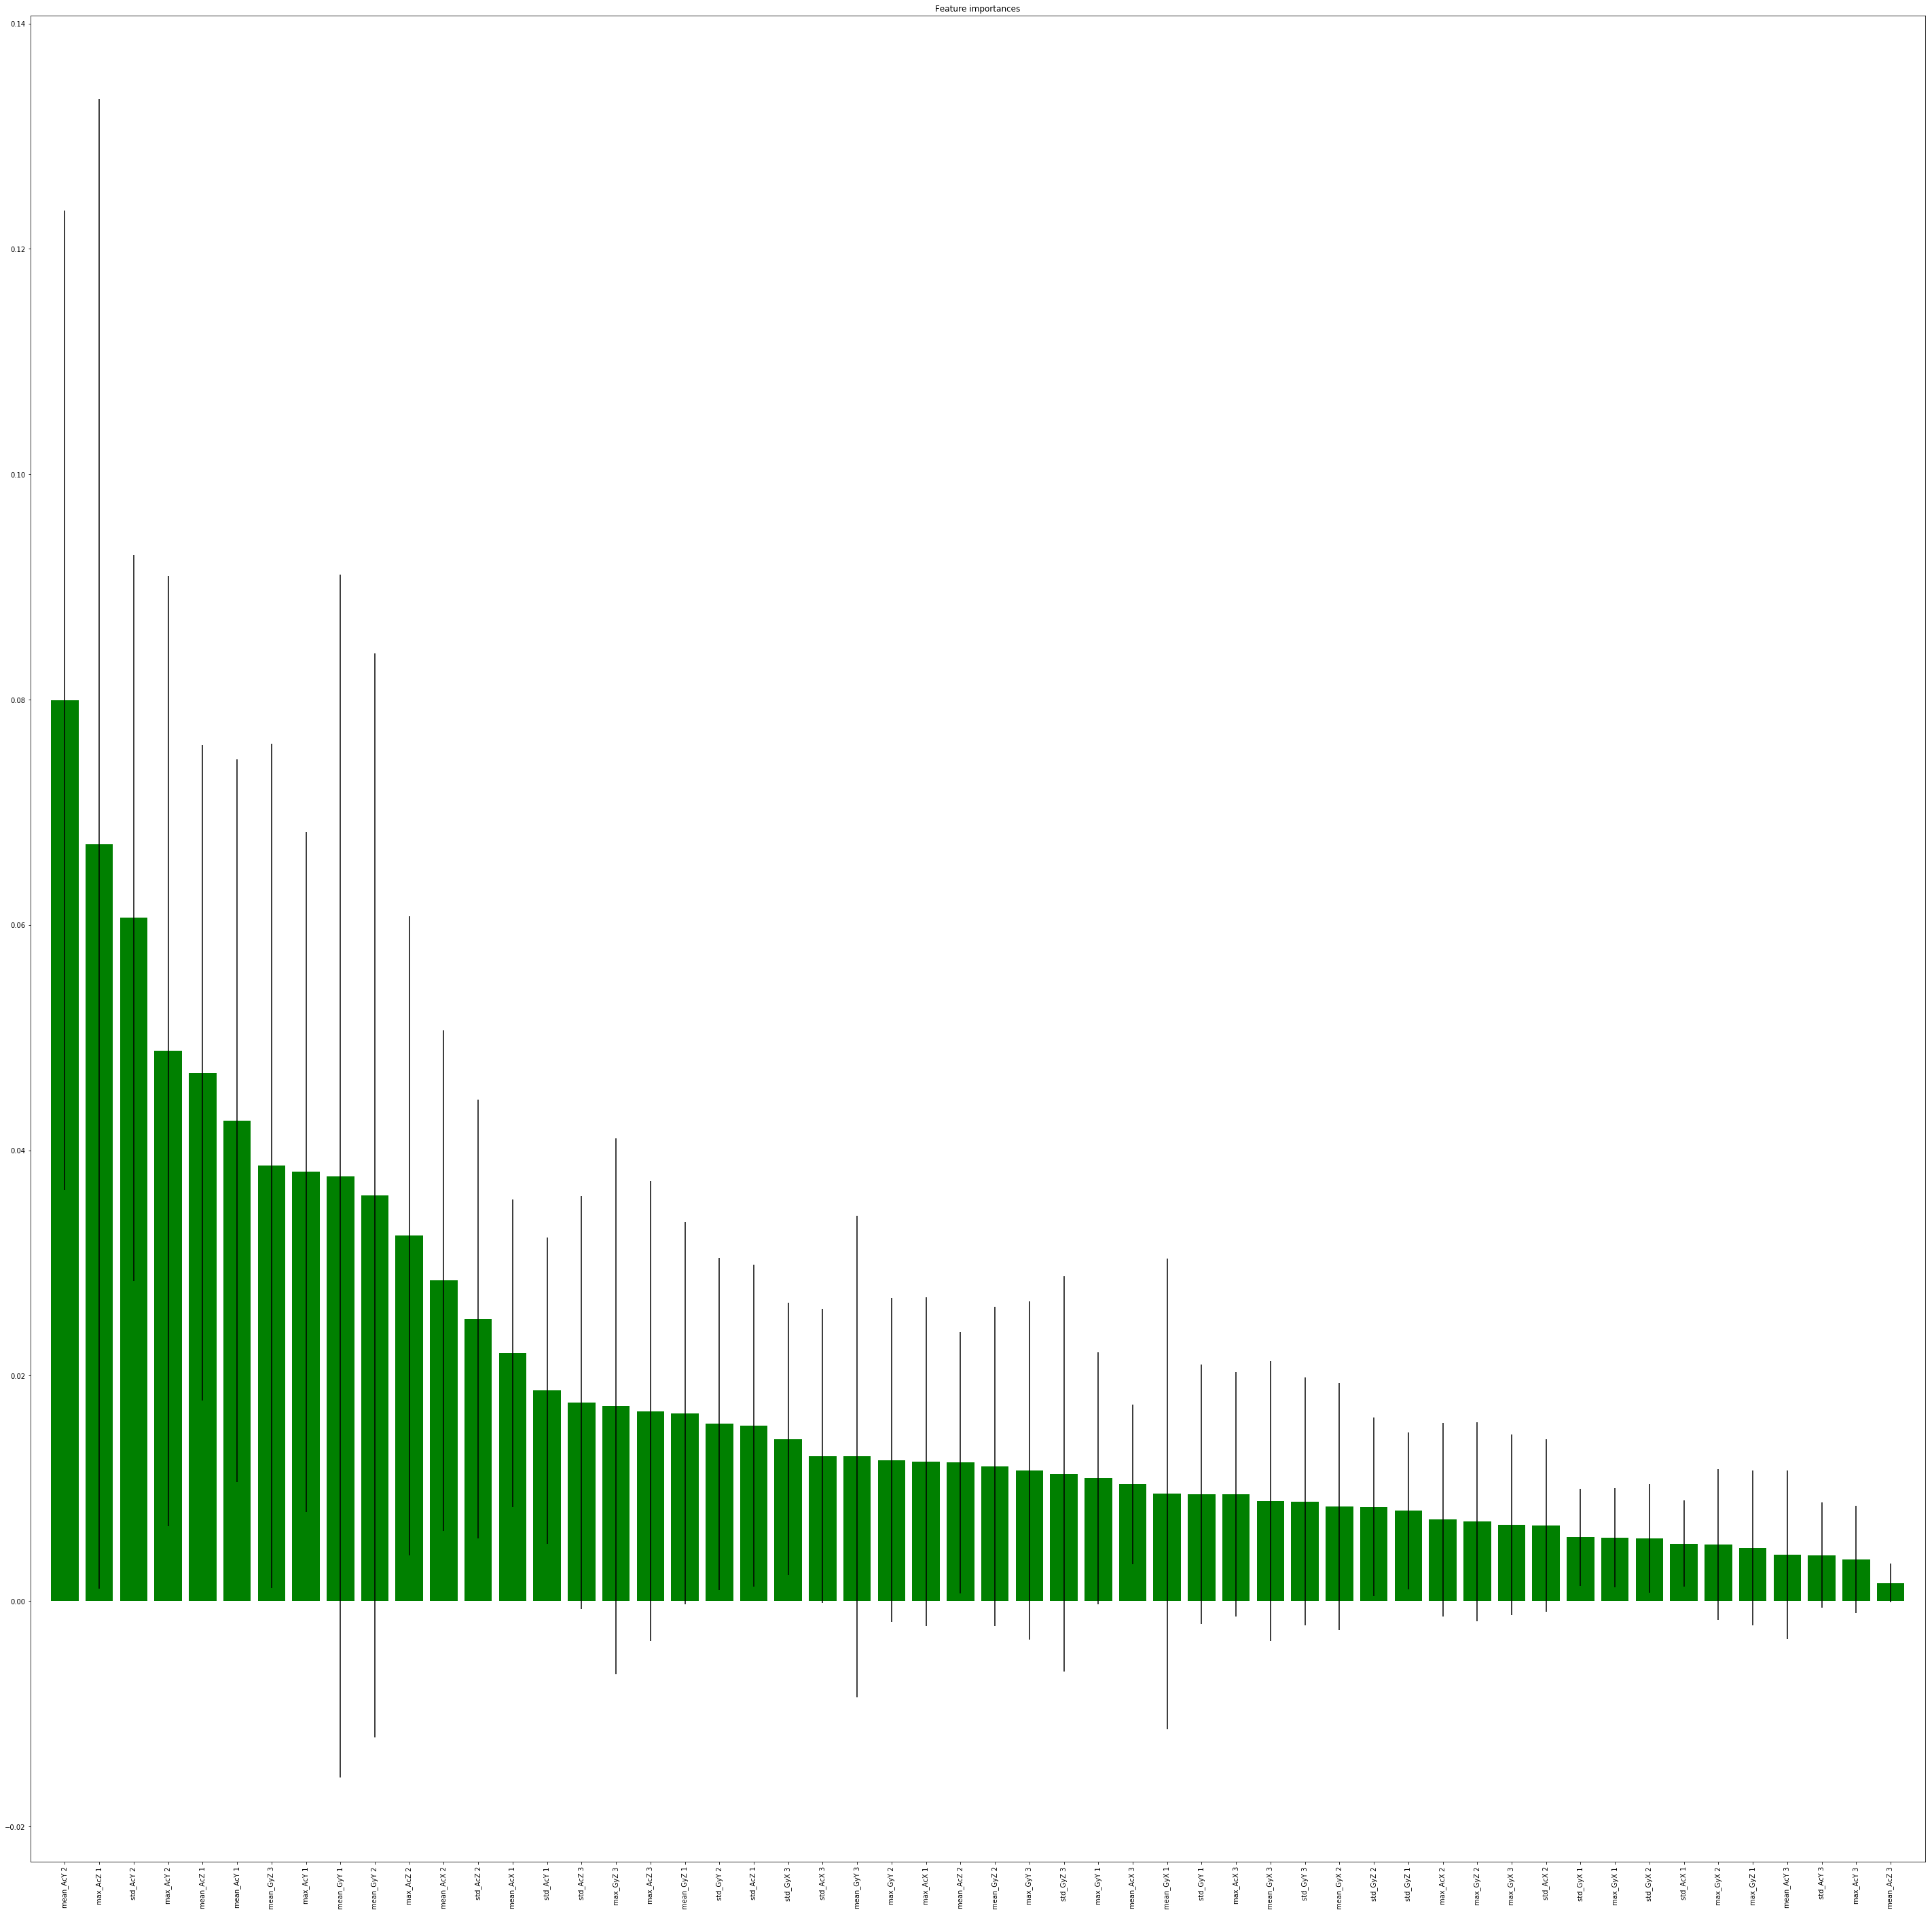

In [5]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

raw_df = pd.read_csv('C:/Users/WEARE1/Downloads/extracted_dataset.csv')
# raw_df = pd.read_csv('C:/Users/WEARE1/Downloads/extracted_dataset (2).csv')

X = raw_df.drop(['activity'],axis = 1 )
y = raw_df['activity'].copy()

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(n_estimators=60, random_state = 30)      
clr_rf = clf_rf.fit(X_train,y_train)

clf_rf_2 = RandomForestClassifier(n_estimators=60,n_jobs=-1)      
clr_rf_2 = clf_rf_2.fit(X_train,y_train)
importances = clr_rf_2.feature_importances_
# importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
mean_importance = 0
max_importance = 0
iqr_importance = 0

for f in range(X_train.shape[1]):
    if (indices[f] < 18):
        mean_importance += importances[indices[f]]
    elif (indices[f] < 36):
        max_importance += importances[indices[f]]
    else:
        iqr_importance += importances[indices[f]]
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))  #based on clf_rf_2.feature_imporatnce_

print("mean importance = %f" %mean_importance) #mean
print("max importance = %f" %max_importance)   #std
print("iqr importance = %f" %iqr_importance)  #max

# print(clf_rf.feature_importances_)
# print(clf_rf_2.feature_importances_)
# print("The training accuracy for Random Forestry is ", clf_rf.score(X_train, y_train))
# print("The testing accuracy for Random Forestry is ", clf_rf.score(X_test, y_test))

# print("The training accuracy for Random Forestry 2 is ", clf_rf_2.score(X_train, y_train))
# print("The testing accuracy for Random Forestry 2 is ", clf_rf_2.score(X_test, y_test))

# Plot the feature importances of the forest

plt.figure(1, figsize=(50, 50))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [26]:
from sklearn.feature_selection import RFECV
# from sklearn.feature_selection import RFE

# #The 'accuracy' scoring is proportional to the  number of correct classification
clf_rf_4 = RandomForestClassifier(n_estimators = 60,n_jobs=-1)
# # rfecv = RFECV(estimator = clf_rf_4, step = 1, cv = 5, scoring = 'accuracy')
# rfe = RFE(clf_rf_4,3)#5-fold cross validation
# # rfecv = rfecv.fit(X_train, y_train)

# print('Optimal number of features :' % rfe.n_)
# print('Best features:' ,X_train.columns[rfecv.support_])


# from sklearn.feature_selection import RFECV

# # The "accuracy" scoring is proportional to the number of correct classifications
# clf_rf_4 = RandomForestClassifier() 
# rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
# rfecv = rfecv.fit(x_train, y_train)

# print('Optimal number of features :', rfecv.n_features_)
# print('Best features :', x_train.columns[rfecv.support_])


# Create the RFE object and compute a cross-validated score.
# svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)
print('Best features:' , X_train.columns[rfecv.support_])

Optimal number of features : 40
Best features: Index(['mean_AcX 1', 'mean_AcX 2', 'mean_AcY 1', 'mean_AcY 2', 'mean_AcZ 1',
       'mean_AcZ 2', 'mean_GyX 1', 'mean_GyX 2', 'mean_GyX 3', 'mean_GyY 1',
       'mean_GyY 2', 'mean_GyY 3', 'mean_GyZ 1', 'mean_GyZ 2', 'mean_GyZ 3',
       'std_AcX 3', 'std_AcY 1', 'std_AcY 2', 'std_AcZ 1', 'std_AcZ 2',
       'std_AcZ 3', 'std_GyX 3', 'std_GyY 1', 'std_GyY 2', 'std_GyY 3',
       'std_GyZ 1', 'std_GyZ 2', 'std_GyZ 3', 'max_AcX 1', 'max_AcX 2',
       'max_AcX 3', 'max_AcY 1', 'max_AcY 2', 'max_AcZ 1', 'max_AcZ 2',
       'max_AcZ 3', 'max_GyY 1', 'max_GyY 2', 'max_GyY 3', 'max_GyZ 3'],
      dtype='object')


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

raw_df = pd.read_csv('C:/Users/WEARE1/Downloads/extracted_dataset.csv') 
# raw_df = pd.read_csv('C:/Users/WEARE1/Downloads/extracted_dataset (2).csv')

X = raw_df.drop(['activity'],axis = 1 )
y = raw_df['activity'].copy()

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# find best scored 5 features
select_feature = SelectKBest(f_classif, k=5).fit(X_train,y_train) #f_classif doesnot care about where X is non_negative or negative
# select_feature = SelectKBest(chi2, k=5).fit(X,y) #cannot use chi2 as Input X should be Non-negative value


print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [1.16973388e-01 2.44678261e-01 1.87657363e-01 6.30136781e-01
 3.91914300e-01 4.87466193e-01 9.55732128e-01 1.24516224e-01
 9.21414539e-01 7.30892196e-03 6.88962652e-02 3.51883944e-02
 2.03584883e-01 8.22235872e-02 9.54507707e-02 1.63027548e-01
 3.46530879e-01 1.46690064e-01 3.86972132e+01 8.46672743e+01
 1.71904698e+01 1.55811778e+02 6.76405413e+02 1.03047784e+01
 8.67439188e+01 2.05874779e+01 1.99242767e+01 5.73586684e+01
 4.50316397e+01 3.69196733e+02 2.67370874e+02 1.90791915e+02
 4.07461178e+02 3.95735043e+01 4.70300012e+01 5.57486344e+02
 3.45892347e+02 1.26669776e+02 2.46258882e+02 4.94231973e+02
 1.31983295e+03 7.56404373e+01 2.06257890e+03 1.14259170e+03
 2.15987368e+02 1.41659330e+02 1.46662485e+02 3.70667058e+02
 2.80785876e+02 1.99889882e+02 2.99830464e+02 9.52902545e+01
 7.90881944e+01 5.98421364e+02]
Feature list: Index(['mean_AcX 1', 'mean_AcX 2', 'mean_AcX 3', 'mean_AcY 1', 'mean_AcY 2',
       'mean_AcY 3', 'mean_AcZ 1', 'mean_AcZ 2', 'mean_AcZ 3', 'mean_GyX

Accuracy is:  0.9423264907135875


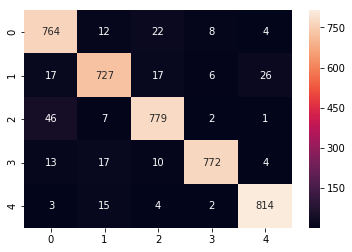

In [22]:
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt


X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [25]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier(n_estimators=60, random_state = 20)      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])


Chosen best 5 feature by rfe: Index(['mean_AcY 2', 'mean_AcZ 1', 'mean_GyZ 3', 'max_AcY 2', 'max_AcZ 1'], dtype='object')
